### Codio Activity 10.5: ACF and PACF Plots for ARMA Models

**Expected Time: 60 Minutes**

**Total Points: 70**

This assignment focuses on using the autocorrelation and partial autocorrelation plots to determine parameters for stationary data.  In general, you will first determine the stationarity of a time series using the Dickey Fuller test (or eyeballing it) and then examine the autocorrelation and partial autocorrelation to identify the parameters for each term.

#### Index

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
import warnings

In [3]:
warnings.filterwarnings('ignore')

### The Data

Two datasets are used to examine stationarity and autoregression and moving average components for ARMA models.  The first is the recruits data, encountered earlier.  The second is a series of Quarterly GNP data from the United States from 1947 through 2002. In the first you predict the number of recruits and the second your target is the difference of the logarithm of the GNP. 

In [7]:
recruits = pd.read_csv('../data/recruitment.csv', index_col=0)

In [9]:
recruits.head()

,value
1950-01-01,68.63
1950-02-01,68.63
1950-03-01,68.63
1950-04-01,68.63
1950-05-01,68.63


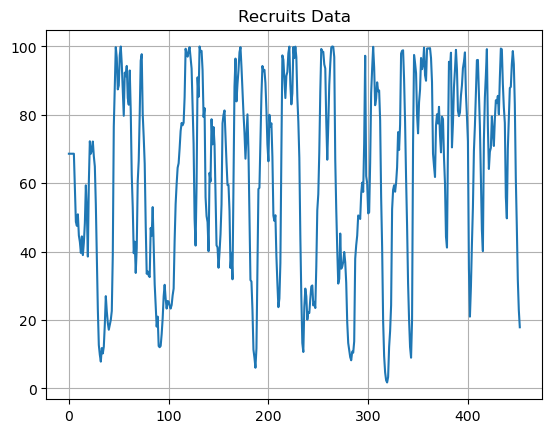

In [11]:
plt.plot(recruits.values)
plt.grid()
plt.title('Recruits Data');

[Back to top](#-Index)

### Problem 1

#### Is it Stationary? 

**10 Points**

As discussed, our ARMA models are only applicable for stationary data.  Use the `adfuller` function to determine if the recruits data is stationary at the 0.05 level.  Assign your answer as a string to `ans1` below.  

In [58]:
### GRADED
result = adfuller(recruits['value'])

# Print the ADF statistic and p-value
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Print the critical values for various confidence levels
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')

# Determine if the series is stationary
if result[1] < 0.05:
    print("The series is stationary (reject the null hypothesis).")
else:
    print("The series is not stationary (fail to reject the null hypothesis).")

ans1 = 'yes'

# Answer check
print(ans1)
print(type(ans1))

ADF Statistic: -6.239970407069513
p-value: 4.723381272810701e-08
Critical Values:
   1%: -3.445299682487321
   5%: -2.8681312035123967
   10%: -2.570280872933884
The series is stationary (reject the null hypothesis).
yes
<class 'str'>


### ADF Test Results Explained

#### 1. **ADF Statistic**:
   - **Value**: `-6.239970407069513`
   - **Explanation**: The ADF statistic is a number that helps you determine whether the time series is stationary. In general, a more negative value indicates stronger evidence against the null hypothesis (which states that the time series has a unit root, meaning it is non-stationary).

#### 2. **p-value**:
   - **Value**: `4.723381272810701e-08` (which is equivalent to `0.00000004723381272810701`)
   - **Explanation**: The p-value is used to determine the statistical significance of the ADF test result. In this case, the p-value is extremely low (close to zero), much lower than the typical significance level of 0.05. This suggests that there is strong evidence to reject the null hypothesis, indicating that the series is likely stationary.

#### 3. **Critical Values**:
   - **1%: `-3.445299682487321`**
   - **5%: `-2.8681312035123967`**
   - **10%: `-2.570280872933884`**
   - **Explanation**: These values represent the critical thresholds at different confidence levels (1%, 5%, and 10%). If the ADF statistic is less than these critical values, you reject the null hypothesis. 

#### 4. **Conclusion Based on the Output**:
   - The ADF statistic (`-6.239970407069513`) is lower (more negative) than all the critical values at the 1%, 5%, and 10% levels.
   - The p-value (`4.723381272810701e-08`) is far below 0.05.
   - **Conclusion**: Given the ADF statistic is much lower than the critical values and the p-value is very small, you can confidently reject the null hypothesis. This means the time series is **stationary** at the 0.05 significance level.


[Back to top](#-Index)

### Problem 2

#### Building train and test set

**10 Points**

Now, we use the familiar `train_test_split` and set `shuffle = False` to create a temporal train and test set.  Leave all arguments to default except `shuffle`.  Assign your results as `y_hist` and `y_future` below. 

In [63]:
### GRADED

# Assuming 'recruits' is your DataFrame and you want to split the 'value' column
y_hist, y_future = train_test_split(recruits, shuffle=False)

# Answer check
print("History\n=========")
print(y_hist.tail())
print("Future\n==========")
print(y_future.head())

History
               value
1977-11-01  98.74000
1977-12-01  98.88000
1978-01-01  90.41001
1978-02-01  77.86000
1978-03-01  61.48000
Future
            value
1978-04-01  47.66
1978-05-01  30.74
1978-06-01  20.11
1978-07-01  12.08
1978-08-01   8.97


[Back to top](#-Index)

### Problem 3

#### Examining acf and pacf

**10 Points**

Below, the ACF and PACF plots are shown.  While the ACF plot isn't incredibly helpful, the PACF may suggest using a value of `p = 1` in an ARMA model.  As such, create and fit an ARIMA model with `p = 1` and `q = 1`.  Assign your fit model as `arma` below.

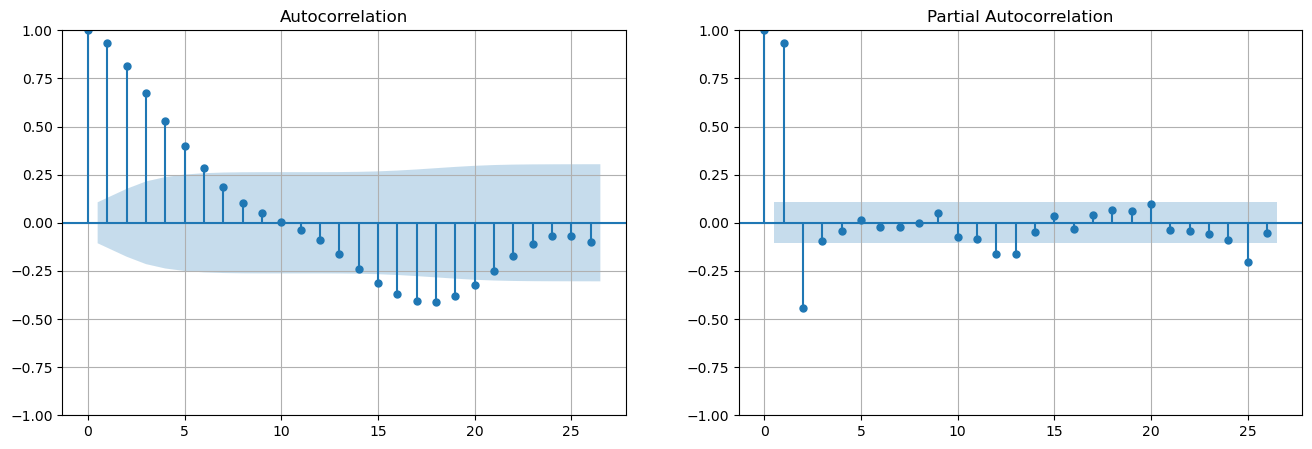

In [67]:
fig, ax = plt.subplots(1, 2, figsize = (16, 5))
plot_acf(y_hist, ax = ax[0]);
ax[0].grid()
plot_pacf(y_hist, ax = ax[1], method = 'ywm');
ax[1].grid()

In [69]:
y_hist.index = pd.to_datetime(y_hist.index)

In [71]:
y_hist.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 339 entries, 1950-01-01 to 1978-03-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   339 non-null    float64
dtypes: float64(1)
memory usage: 5.3 KB


In [81]:
### GRADED

arma = ARIMA(y_hist, order=(1, 0, 1)).fit()

# Answer check
print(arma)

[Back to top](#-Index)

### Problem 4

#### Making Predictions

**10 Points**

Use the `arma` object to make predictions for the training data.  Assign these results as `hist_preds` below.  Uncomment the code to view a plot of the results against the original series. 

1977-11-01    100.628693
1977-12-01     93.700356
1978-01-01     96.456426
1978-02-01     84.710623
1978-03-01     73.198915
Freq: MS, Name: predicted_mean, dtype: float64


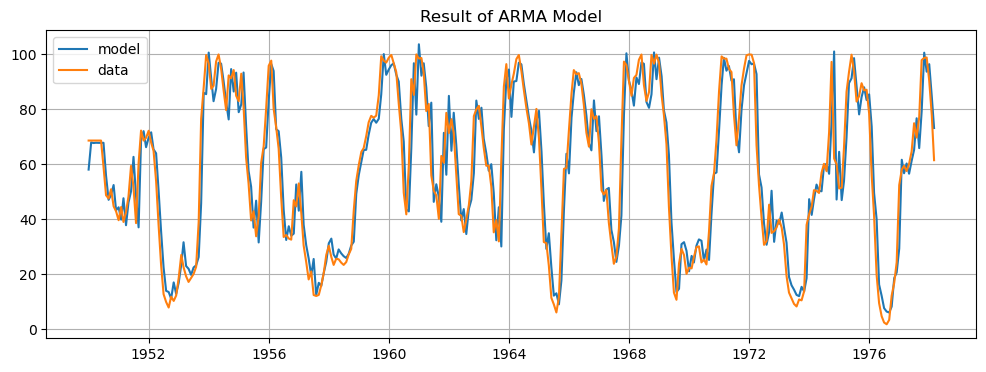

In [85]:
### GRADED

hist_preds = arma.predict()

# Answer check
print(hist_preds.tail())
plt.figure(figsize = (12, 4))
plt.plot(hist_preds, label = 'model')
plt.plot(y_hist, label = 'data')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

[Back to top](#-Index)

### Problem 5

#### Forecasting with the ARMA model

**10 Points**

Finally, to use the forecasting capabilities of the model, pass the number of steps to forecast in the future.  Assign the forecast into the future to match up with `y_future` values as `future_preds` below.  

In [89]:
y_future.index = pd.to_datetime(y_future.index)

In [121]:
### GRADED

future_preds = arma.forecast(steps = len(y_future))

# Answer check
print(future_preds.tail())
print(y_future.tail())

1987-05-01    58.053023
1987-06-01    58.053024
1987-07-01    58.053024
1987-08-01    58.053025
1987-09-01    58.053025
Freq: MS, Name: predicted_mean, dtype: float64
            value
1987-05-01  61.42
1987-06-01  47.47
1987-07-01  31.81
1987-08-01  22.95
1987-09-01  17.87


[Back to top](#-Index)

### Problem 6

#### The GNP series

**10 Points**

Below, the `gnp` data is loaded and displayed.  This data is transformed according to the first difference of the logarithm so as to form a stationary series.  Then, the ACF and PACF plots are shown on the stationary series.  These suggest that an AR(2) and MA(2) model might be appropriate.  Build an `ARIMA` model on `y` and predict as `preds`.  Uncomment the code to visualize the predictions.

In [95]:
gnp = pd.read_csv('../data/gnp.csv', index_col=0)
gnp.index = pd.Index(pd.date_range("1947-Q1", "2002-Q4", freq = "Q"))
gnp.head()

,value
1947-03-31,1488.9
1947-06-30,1496.9
1947-09-30,1500.5
1947-12-31,1524.3
1948-03-31,1546.6


<Axes: >

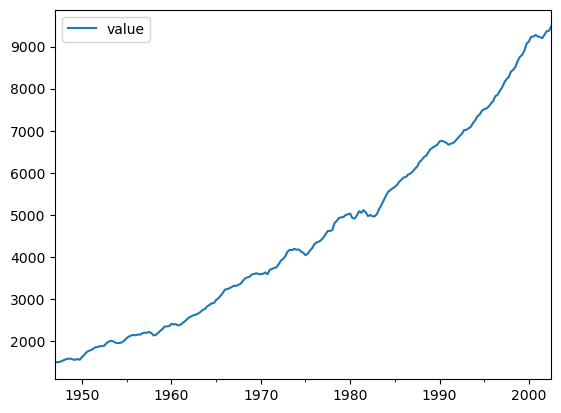

In [97]:
gnp.plot()

In [99]:
y = np.log(gnp).diff().dropna()

In [101]:
#note the stationarity
adfuller(y)

(-10.291967758822777,
 3.550732270832684e-18,
 0,
 221,
 {'1%': -3.4602906385073884,
  '5%': -2.874708679520702,
  '10%': -2.573788599127782},
 -1350.8710047523716)

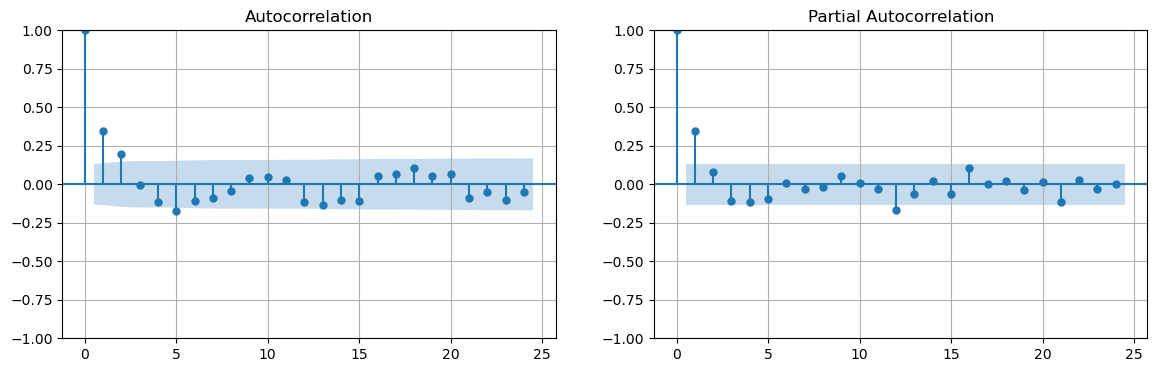

In [103]:
fig, ax = plt.subplots(1, 2, figsize = (14, 4))
plot_acf(y, ax = ax[0]);
ax[0].grid()
plot_pacf(y, ax = ax[1])
ax[1].grid();

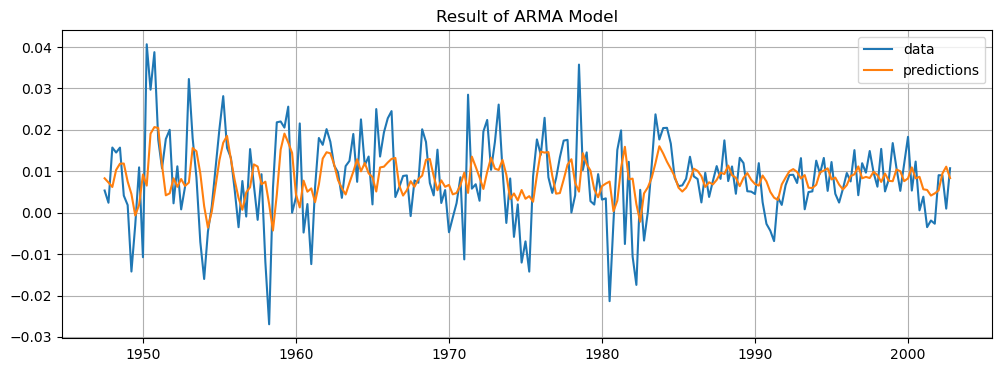

In [113]:
### GRADED

arma2 = ARIMA(y, order=(2, 0, 2)).fit()
preds = arma2.predict()

# Answer check
plt.figure(figsize = (12, 4))
plt.plot(y, label = 'data')
plt.plot(preds, label = 'predictions')
plt.legend()
plt.grid()
plt.title('Result of ARMA Model');

[Back to top](#-Index)

### Problem 7

#### Errors and Autocorrelation

**10 Points**

Below, subtract the predictions from the actual series.  Determine the stationarity of the results by examining the autocorrelation plot of the residuals.  Is there structure remaining in the series based on this?  Assign your answer as a string to `ans7` below -- 'yes' or 'no'.

In [117]:
preds = pd.DataFrame(preds)
preds.columns = ['value']

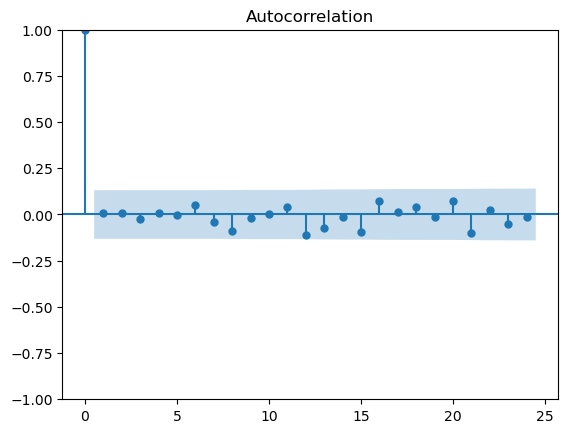

In [119]:
### GRADED

resids = y - preds
ans7 = 'no'

# Answer check
plot_acf(resids);